In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pickle

In [2]:
vb = pd.read_csv("../data/vb_data_numZone.csv")

In [34]:
q_values_raw = pickle.load(open('../output/q_values.pkl', 'rb'))
q_values = np.asarray([q_values_raw[i,0] for i in range(len(q_values_raw))])
y_prob_tree = pickle.load(open('../output/y_probabilities_tree.pkl', 'rb'))
q_tree = y_prob_tree[:,1]*2 - 1

In [35]:
print(q_values)
print(q_tree)

[0.3808491  0.32960394 0.33001888 ... 0.2206401  0.2711425  1.041408  ]
[0.30304393 0.24038807 0.23152709 ... 0.11903945 0.2441247  1.        ]


In [27]:
print('Total mean Q for NN:', np.mean(q_values))
print('Total mean Q for Tree:', np.mean(q_tree))

Total mean Q for NN: 0.051546168
Total mean Q for Tree: 0.037925512681440156


In [60]:
print('\nHome Attack:')
for outcome in ['=','/','-','!','+','#']:
    cond = (vb['ActionType0']=='A') & (vb['ActionHome0']==1) & (vb['ActionOutcome0']==outcome)
    print('%s: avg Q %.3f for tree, %.3f for neural net)' % \
          (outcome, np.mean(q_tree[cond], axis=0), np.mean(q_values[cond], axis=0)))
    
print('\nHome Receive:')
for outcome in ['=','-','!','+','#']:
    cond = (vb['ActionType0']=='R') & (vb['ActionHome0']==1) & (vb['ActionOutcome0']==outcome)
    print('%s: avg Q %.3f for tree, %.3f for neural net)' % \
          (outcome, np.mean(q_tree[cond], axis=0), np.mean(q_values[cond], axis=0)) )
    
print('\nHome Serve:')
for outcome in ['=','-','!','+','#']:
    cond = (vb['ActionType0']=='S') & (vb['ActionHome0']==1) & (vb['ActionOutcome0']==outcome)
    print('%s: avg Q %.3f for tree, %.3f for neural net)' % \
          (outcome, np.mean(q_tree[cond], axis=0), np.mean(q_values[cond], axis=0)) )
    
print('\nAway Serve:')
for outcome in ['=','-','!','+','#']:
    cond = (vb['ActionType0']=='S') & (vb['ActionAway0']==1) & (vb['ActionOutcome0']==outcome)
    print('%s: avg Q %.3f for tree, %.3f for neural net)' % \
          (outcome, np.mean(q_tree[cond], axis=0), np.mean(q_values[cond], axis=0)) )
    
cond = (vb['ActionType0']=='S') & (vb['ActionHome0']==1) & (vb['ActionOutcome0']=='+')
print(q_tree[cond])
cond = (vb['ActionType0']=='R') & (vb['ActionAway0']==1) & (vb['ActionOutcome0']=='-')
print(q_tree[cond])



Home Attack:
=: avg Q -0.932 for tree, -1.000 for neural net)
/: avg Q -0.920 for tree, -0.988 for neural net)
-: avg Q -0.069 for tree, -0.060 for neural net)
!: avg Q 0.092 for tree, 0.111 for neural net)
+: avg Q 0.288 for tree, 0.373 for neural net)
#: avg Q 0.986 for tree, 1.008 for neural net)

Home Receive:
=: avg Q -1.000 for tree, -1.007 for neural net)
-: avg Q -0.132 for tree, -0.116 for neural net)
!: avg Q 0.119 for tree, 0.174 for neural net)
+: avg Q 0.297 for tree, 0.344 for neural net)
#: avg Q 0.410 for tree, 0.440 for neural net)

Home Serve:
=: avg Q -1.000 for tree, -0.999 for neural net)
-: avg Q -0.289 for tree, -0.295 for neural net)
!: avg Q 0.119 for tree, -0.098 for neural net)
+: avg Q 0.119 for tree, 0.200 for neural net)
#: avg Q 1.000 for tree, 0.998 for neural net)

Away Serve:
=: avg Q 1.000 for tree, 1.018 for neural net)
-: avg Q 0.303 for tree, 0.386 for neural net)
!: avg Q 0.303 for tree, 0.198 for neural net)
+: avg Q -0.129 for tree, -0.090 for 

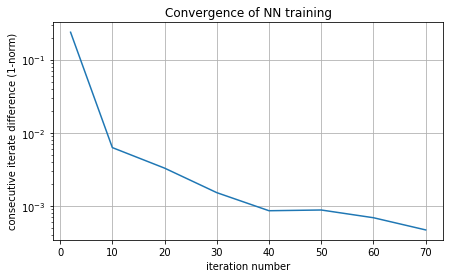

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.xlabel('iteration number')
plt.ylabel('consecutive iterate difference (1-norm)')
plt.title('Convergence of NN training')
plt.grid(True)
plt.semilogy([2,10,20,30,40,50,60,70],[0.2375,0.00628,0.00329,0.00152,0.00086,0.00088,0.00069,0.00047])

In [87]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(np.sign(q_tree), vb.RewardValue))

Accuracy: 0.7458856345885635


In [85]:
print(np.max(np.abs(q_values-q_tree)))
cond = (np.abs(q_values - q_tree) > 1)
print(q_values[cond])
print(q_tree[cond])
print("Accuracy NN", metrics.accuracy_score(np.sign(q_values[cond]), vb[cond].RewardValue))
print("Accuracy Tree:", metrics.accuracy_score(np.sign(q_tree[cond]), vb[cond].RewardValue))
print(sum(cond))
#print(vb[cond].ActionType0, vb[cond].ActionOutcome0, vb[cond].RewardValue)

1.989061430648521
[ 1.0221545   1.0119308   1.0338941  -0.96705043 -0.985116    1.0324363
 -0.9743025  -0.9708614  -1.0364941  -1.0225405  -1.0383315   0.941309
 -1.0036547  -1.0001847  -0.1385398  -0.9887053  -0.96561104 -1.0359799
 -0.9912264  -1.0016415  -0.9828694  -1.0179595  -0.9651378  -1.0122312
 -1.005498   -0.98672456 -0.9267727  -0.9843691   1.0018296  -0.20468608
  1.0382429   1.0200009  -0.99163395 -0.9319249   0.96689695 -0.92248875
 -0.95307714 -1.0203589   0.524072    0.94748455 -0.92394906 -0.98089576
  1.029003   -1.0178856  -0.9915469  -1.0159575  -0.9872432  -0.16550711
 -0.98974925  0.96267074 -0.13794465 -0.9580372   1.0596868   0.48914218
 -1.0228784   0.9668097  -0.9836542   0.4267995   1.0198367  -1.0522717
 -0.12620157 -0.91200787 -1.0056471   1.0075047   1.0153419  -0.80953455
 -0.9921221  -0.9717044  -0.15732126 -0.89721924 -0.97713274 -0.06962697
  1.0506333   0.20325483 -0.9734301  -0.9621962  -0.9810571  -1.002669
 -0.94598466 -0.35160524 -0.34897313 -0.3